# Sequence Risk 

I want to analyse the time effects of withdrawing capital during periods of market stress

In [3]:
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
import numpy as np

/Users/mrefermat/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
import seaborn as sns
import pylab
import math
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [5]:
mu=0.06
std=0.15
withdraw=0.04
contribution=0.02
years=10

Modelling the portfolio via a Weiner process

$$ r_t = \mu dt + \sigma dW $$

where $\mu$ is the long term expected returns (for this analysis it is not time varying, $\sigma$ is the volatility (also not time varying, and $dW$ is a Gaussian Brownian process.  

In [6]:
sims=pd.DataFrame()
for i in range(0,100):
    sims[i]=pd.Series(np.random.normal(mu/12.,std/math.sqrt(12),years*12))

# First observation

When $withdraw$ > $contribution$, not only are long term expected returns lower (reducing compounding effects), but also the distribution of difference between a portfolio with no net withdraws and one with withdraws is highly negatively skews and depenedent on the sequency of the returns.

In [59]:
perf_diffs={}
for i in range(0,1000):
    x=pd.Series(np.random.normal(mu/12.,std/math.sqrt(12),years*12))
    y=x-withdraw/12+contribution/12
    a=(pd.DataFrame([x,y]).T+1).cumprod()
    perf_diffs[i]=a.iloc[-1].diff()[1]

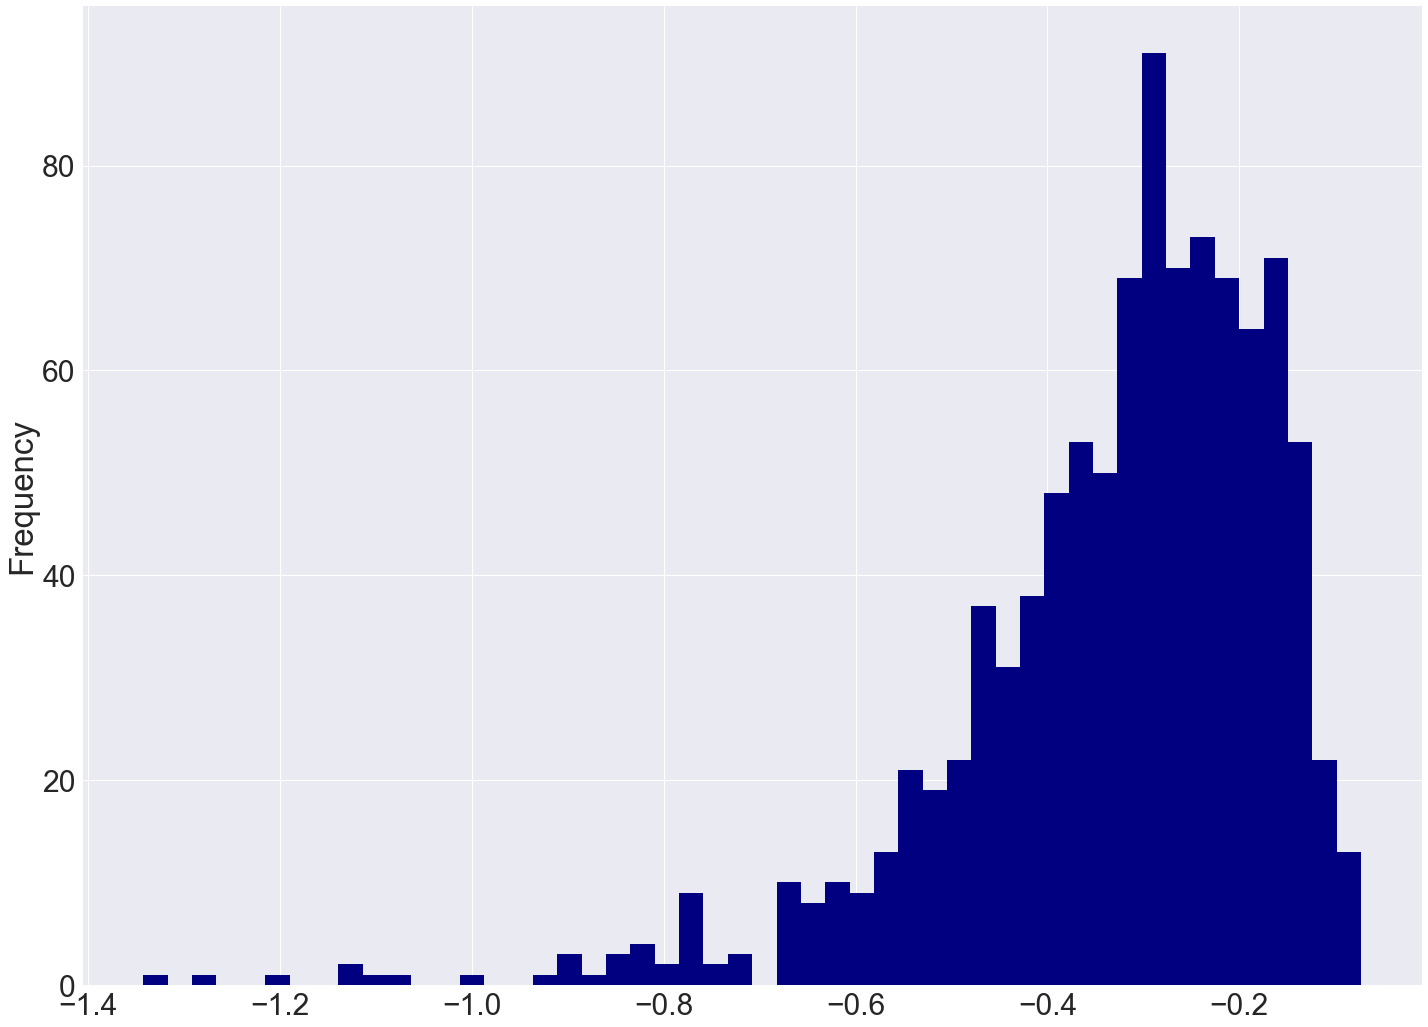

In [60]:
pd.Series(perf_diffs).plot(kind='hist',bins=50,colormap='jet')

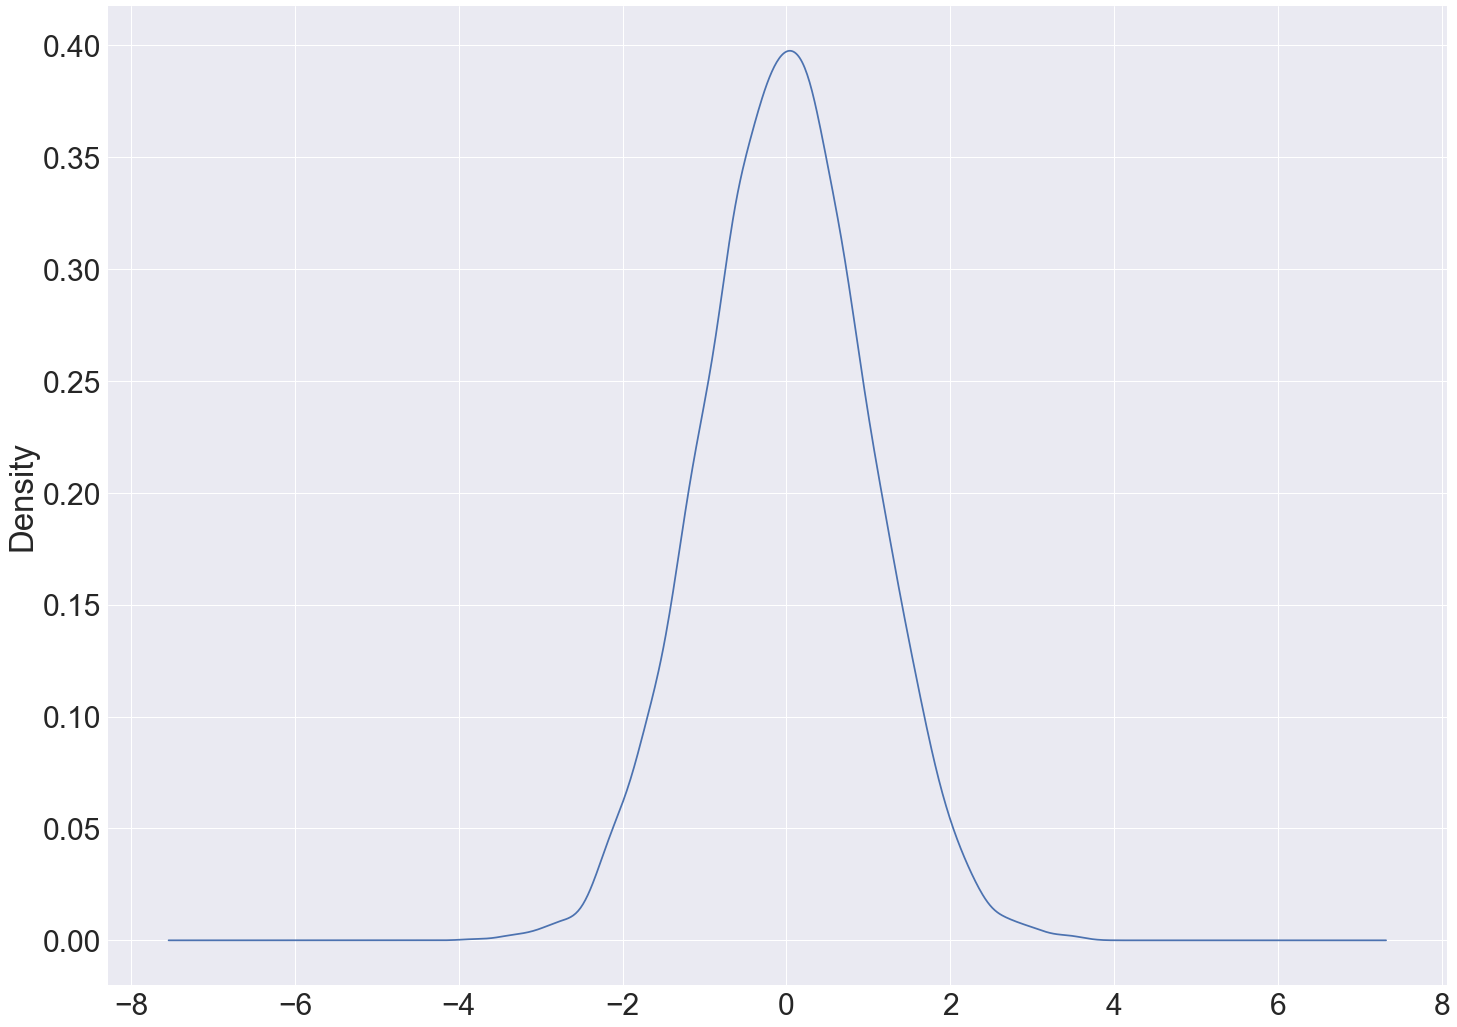

In [19]:
pd.Series(np.random.normal(0,1,10000)).plot(kind='kde')